# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [2]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [3]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+', alpha=0.3, label=label)

Read the GSS data again.

In [4]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

Wall time: 266 ms


(62466, 101)

In [5]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,NaN,0,2,0,26.0,18.0,12,12.0,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30.0,2,0,1,38.0,12.0,97,NaN,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,NaN,0,7,0,57.0,12.0,7,7.0,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18.0,1,6,3,61.0,14.0,8,5.0,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22.0,2,3,3,59.0,12.0,6,11.0,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [6]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

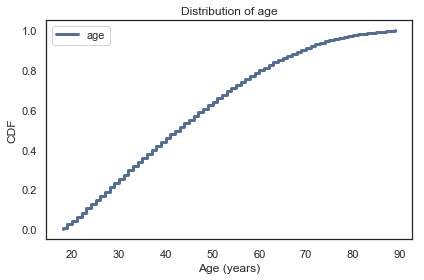

In [7]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation: Comparing the model and actual CDFs, it is possible to see that there is a considerable difference between them. The normal CDF is a symmetric sigmoid while the actual CDF follows more of a straight line shape (excluding the right tail). With that being said, it is possible to say that a normal distribution is not a very good model for this distribution, but whether it is good enough for practical purposes depends on the purposes. By plotting a normal probability plot we can check that in more detail.

n, mean, std 62281 44.47905368874617 16.482037485676


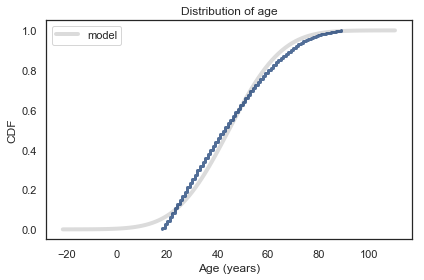

In [8]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

Interpretation: By comparing the CDF plots in item 1, we could see that there was a considerable difference between the model and the actual plot. Now, comparing the normal probability plots, it is possible to see that the model fits the distribution well, except for the tails. By comparing both the CDF plots and normal probability plots, I would conclude that the normal is not good to model the distribution of ages because it has considerable differences and doesn't give me too much confidence that the results won't mislead me.

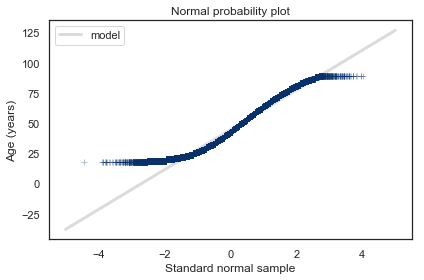

In [9]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

Interpretation: In this case, we're trying to see if it fits as a exponential distribution, because its CCDF on a log-y scale is a straight line. As it can be observed, the plotted CDF resembles a straight line until 50 years, then it makes a curve. It can be a good model until 50 years or so. After 50 years the curve shows that the distribution doesn't fit an exponencial model.

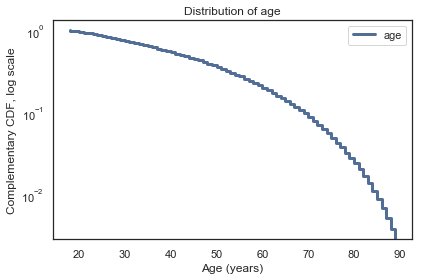

In [10]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

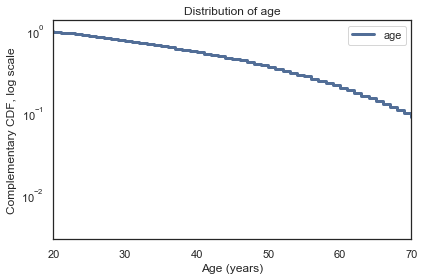

In [11]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log',
        xlim=(20,70))

4) Here's the CDF of ages on a log-x scale.

Interpretation: If the distribution's CDF of the log(x) of a distribution is a symmetric sigmoid, it fits a lognormal distribution. In this case, the distribution of ages follows more of a straight line than a sigmoid. Because of that, we can't say that it fits a lognormal model.

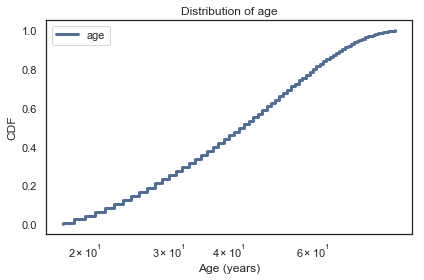

In [12]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation: In this case we can see with more precision that the age distribution doesn't fit the lognormal model. There are considerable differences between the shapes of the curves. It is possible to see that the blue line doesn't follow a sigmoid (like the grey curve suggests), but more of a straight line.

n, mean, std 62281 1.6168744157503179 0.16787914328916784


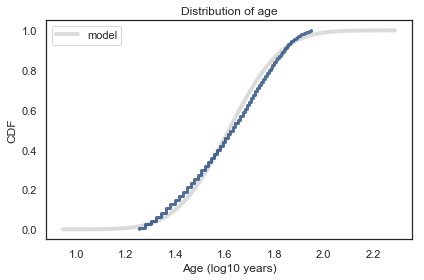

In [13]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation: If the distribution's normal probability plot of log(x) is a straight line, then it fits a lognormal model. As we can observe, comparing the normal probability plots, it is possible to see that the model fits the distribution well, except for the tails. Because of that, we can have the same conclusion as exercise 2: the lognormal is not good to model the distribution of ages, because there are considerable differences.

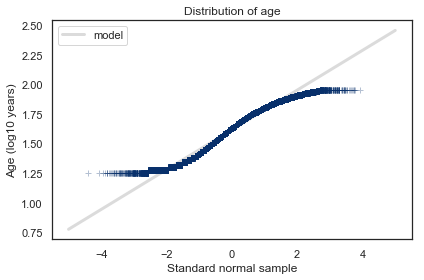

In [14]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: If the distribution's CCDF on a log-log scale is a straight line, then it fits a Pareto model. In this case, half of the plot ressembles a straight line, then it makes a sharp curve. It is similar to what we've seen for the exponencial model, so if I had to choose one of the two, I would choose the exponencial model because it's simpler for me and the results are very similar.

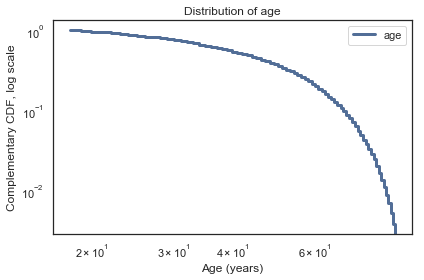

In [15]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation: To check if the ages are well-modeles by a Weibull distribution, the log of the CCDF in a log-log scale must be a straight line. As we can observe, the left tail of the plot doesn't follow a straight line, but starting at 3*10^-1 in the x scale, it seems that it can be a good fit. As I said in the first exercise, whether it is good enough for practical purposes depends on the purposes.

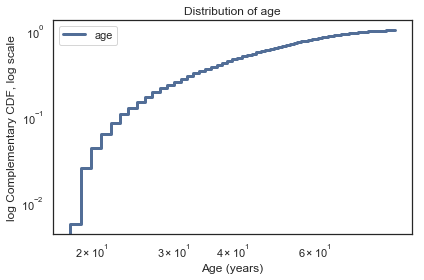

In [16]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

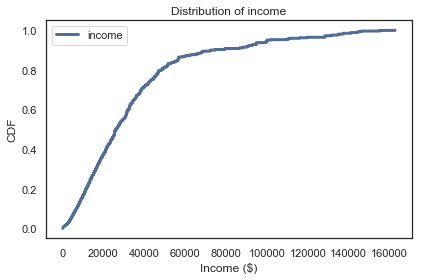

In [17]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income ($)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

n, mean, std 55499 33882.52181307481 28502.895120969348


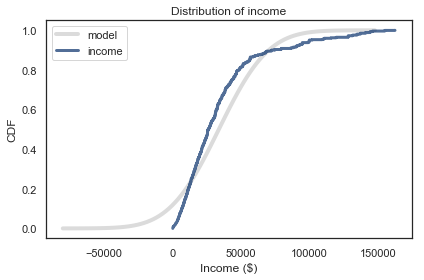

In [18]:
MakeNormalModel(gss.realinc.dropna(), label='income')

decorate(title='Distribution of income', 
         xlabel='Income ($)', 
         ylabel='CDF')

Item 1 doesn't give any evidence that it'll be a good fit for the model.

2) Here's a normal probability plot for the values.

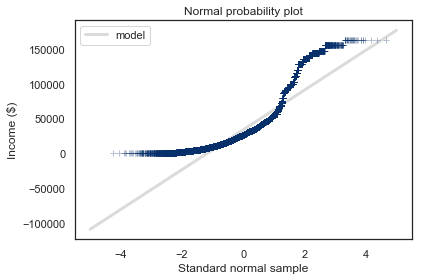

In [19]:
MakeNormalPlot(gss.realinc.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income ($)')

Item 2 doesn't give any evidence that it'll be a good fit for the model.

3) Here's the complementary CDF on a log-y scale.

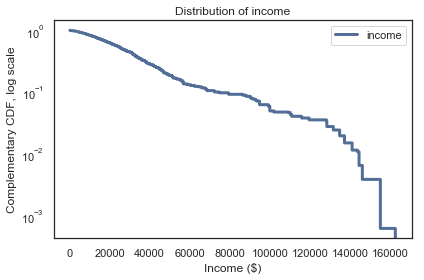

In [20]:
thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income ($)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

Item 3 doesn't give any evidence that it'll be a good fit for the model.

4) Here's the CDF on a log-x scale.

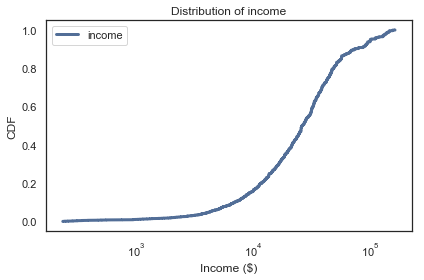

In [21]:
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income ($)', 
         ylabel='CDF',
         xscale='log')

Item 4 doesn't give any evidence that it'll be a good fit for the model.

5) Here's the CDF of the logarithm of the values, compared to a normal model.

n, mean, std 55499 4.381031736514132 0.3856600273208646


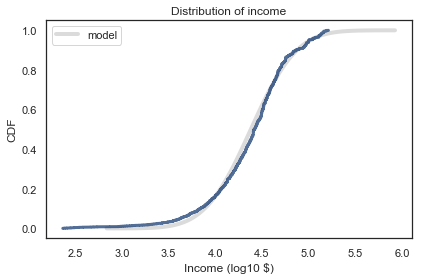

In [22]:
values = np.log10(gss.realinc.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of income', 
         xlabel='Income (log10 $)', 
         ylabel='CDF')

Observing items 5, we can see that the CDF of the log(x) values follow a symmetric sigmoid with little differences, giving us evidence that the lognormal distribution can be a good model for the income distribution. We can see more details below.

6) Here's a normal probability plot for the logarithm of the values.

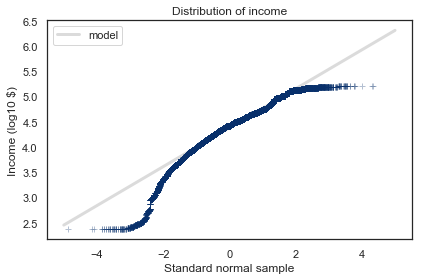

In [23]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of income', 
         xlabel='Standard normal sample', 
         ylabel='Income (log10 $)')

However, by observing item 6, the normal probability plot for the log(x) values show that, although the middle of the curve follows a straight line, the tails have strange curves.  

7) Here's the complementary CDF on a log-log scale.

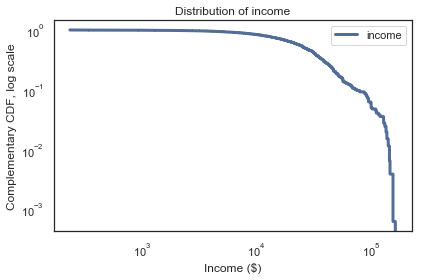

In [24]:
thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income ($)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

Item 7 doesn't give any evidence that it'll be a good fit for the model.

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

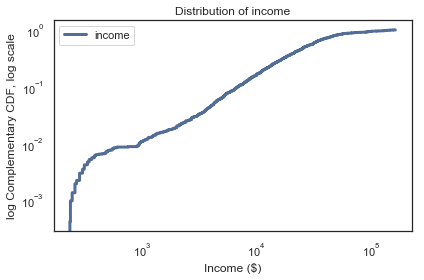

In [25]:
thinkplot.cdf(cdf_realinc, label='income', transform='Weibull')

decorate(title='Distribution of income', 
         xlabel='Income ($)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

Item 8 shows a test to see if the values are well-modeled by a Weibull distribution. We can see from the plot that, although the tails aren't good, the middle of the curve has a pretty good straight line. This shows that one of our options to model the income distribution is the Weibull distribution.

Interpretation:

Looking at all the plotted visualizations, only numbers 5, 6 and 8 can help us conclude something, because all the others don't show any evidence of a good fit for a model.  
Given the interpretations and the complexity of each distribution, the lognormal distribution would be the best option to model our income distribution. We can conclude that because the lognormal is simpler to understand than the Weibull, and it showed us good results at item 5.

## BRFSS


In [26]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

Wall time: 16 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

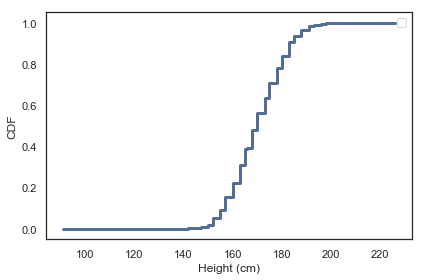

In [27]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [28]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

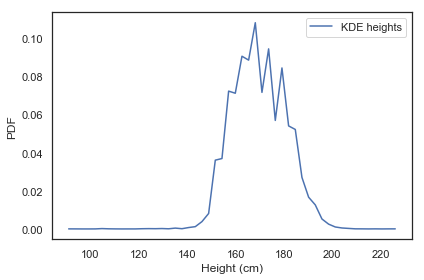

In [29]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

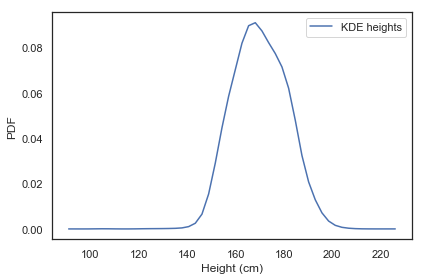

In [30]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [31]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191893)

Here's the model compared to the estimated PDF.

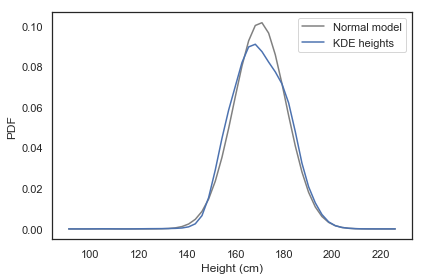

In [32]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

In [33]:
heights_female = brfss[brfss["SEX"] == 2].HTM4

kde = gaussian_kde(heights_female.dropna(), bw_method=0.3)
xs = np.linspace(heights_female.min(), heights_female.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = heights_female.mean()
std = heights_female.std()

mean, std

(162.96853146853147, 7.582218127934885)

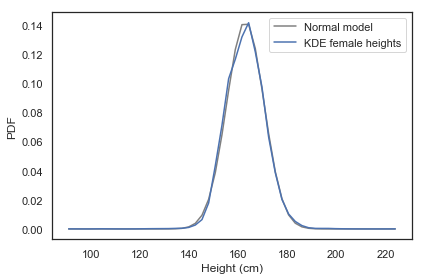

In [34]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE female heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

In [35]:
weights_male = brfss[brfss["SEX"] == 1].WTKG3

kde = gaussian_kde(weights_male.dropna(), bw_method=0.3)
xs = np.linspace(weights_male.min(), weights_male.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = weights_male.mean()
std = weights_male.std()

mean, std

(88.83871202340993, 20.135078906401347)

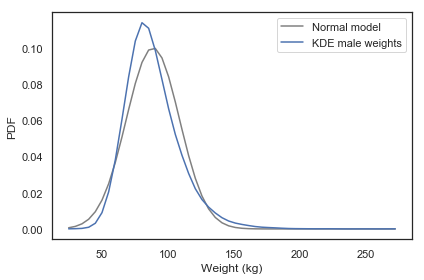

In [36]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE male weights')

decorate(xlabel='Weight (kg)', ylabel='PDF')

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

R: Using the log of men's weights makes the model much better! That implies that the distribution of weights may follow a lognormal distribution. By plotting the CDF of the log(x) values, we can see that they follow a symmetric sigmoid, giving us more evidence towards the lognormal distribution conclusion.

In [37]:
weights_male = np.log10(brfss[brfss["SEX"] == 1].WTKG3)

kde = gaussian_kde(weights_male.dropna(), bw_method=0.3)
xs = np.linspace(weights_male.min(), weights_male.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = weights_male.mean()
std = weights_male.std()

mean, std

(1.9383408289484594, 0.09325128987527467)

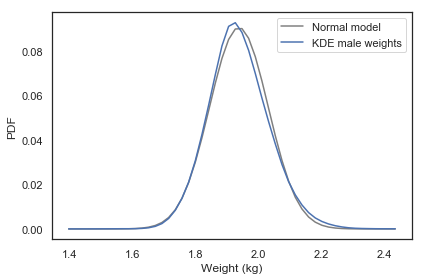

In [38]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE male weights')

decorate(xlabel='Weight (kg)', ylabel='PDF')

n, mean, std 46476 1.9377620062798935 0.0859515712544287


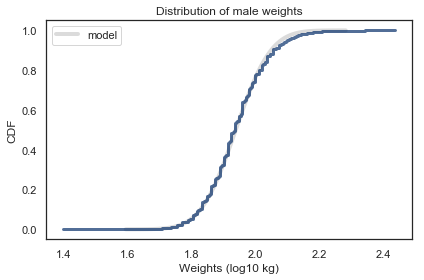

In [39]:
MakeNormalModel(weights_male.dropna(), label='')

decorate(title='Distribution of male weights', 
         xlabel='Weights (log10 kg)', 
         ylabel='CDF')

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [40]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [41]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [42]:
male_weights.mean(), male_weights.median()

(88.83871202340993, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [43]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [44]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?
The distribution of female weights is more skewed to the right than the distribution of male weights, because of the Pearson Median Skewness.

In general:
- The direction of skewness is given by the sign.
- The coefficient compares the sample distribution with a normal distribution. The larger the value, the larger the distribution differs from a normal distribution.
- A value of zero means no skewness at all.
- A large negative value means the distribution is negatively skewed.
- A large positive value means the distribution is positively skewed.

Source: https://www.statisticshowto.datasciencecentral.com/pearsons-coefficient-of-skewness/

In [45]:
female_weights.mean(), female_weights.median()

(73.62438714355793, 70.31)

In [46]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [47]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!  

##### Life expectancy differences of male and female age distribution

My goal here was to check the differences between male and female age distributions. By looking at the skewness, CDFS and means, I could check if which group is older than the other and also life expectancy differences.

In [48]:
male = (brfss.SEX == 1)
male_ages = brfss.loc[male, 'AGE']

thinkstats2.PearsonMedianSkewness(male_ages.dropna())

0.11896638949350637

In [49]:
female = (brfss.SEX == 2)
female_ages = brfss.loc[female, 'AGE']

thinkstats2.PearsonMedianSkewness(female_ages.dropna())

0.10261034297327291

In [50]:
thinkstats2.PearsonMedianSkewness(brfss.AGE.dropna())

0.11481487976399707

By looking at the Pearson Median Skewness of all possible groups (female only, male only and both), we can see that every distribution is slightly skewed to the right, meaning that there are more older people than average in every group. 
This is also interesting because it gives openings to analisys regarding the Economically Active Population. 

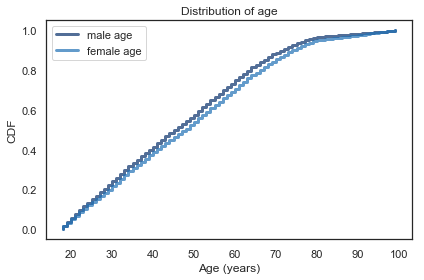

In [51]:
cdf_age_male = Cdf(male_ages)
cdf_age_female = Cdf(female_ages)
thinkplot.cdf(cdf_age_male, label='male age')
thinkplot.cdf(cdf_age_female, label='female age')
decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

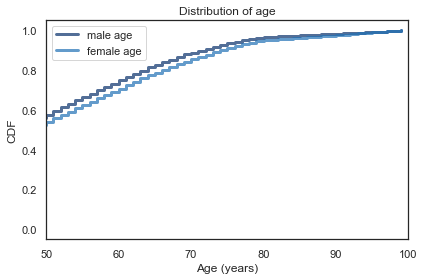

In [52]:
thinkplot.cdf(cdf_age_male, label='male age')
thinkplot.cdf(cdf_age_female, label='female age')
decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
        xlim=(50,100))

By plotting both CDFs, we can see that the male population is slightly bigger than the female population, because the male CDF reaches the peak faster. However, we can see that the female curve catches up when the age is more advanced, meaning that maybe there are more older women than men.

In [53]:
male_ages.describe()

count    48053.000000
mean        46.735708
std         18.552706
min         18.000000
25%         31.000000
50%         46.000000
75%         61.000000
max         99.000000
Name: AGE, dtype: float64

In [54]:
female_ages.describe()

count    50696.000000
mean        48.660841
std         19.321082
min         18.000000
25%         32.000000
50%         48.000000
75%         63.000000
max         99.000000
Name: AGE, dtype: float64

By looking at the means, we can see that the female population is older than the male populiation. Howerver, is it enough to conclude that female life expectancy is superior to the male life expectancy by looking at means and CDFs?
To help me conclude something about that, I used a population pyramid ( https://www.populationpyramid.net/united-states-of-america/2017/ ). We can see that all the evidence that we gathered using CDFs, skewness, and means are also in the pyramid, giving us a bigger confidence to conclude things. By looking at it, we can see that there are more males in the beggining, but also there are always more females than males beggining at 60 years old.  
It is safe to say that the female population has a larger life expectancy than the male population, but I didn't know how to quantify that properly. Although I didn't quantify it, having a hint of what to expect helps sometimes and I can check my results by looking for other researches (for example: https://www.statista.com/statistics/274513/life-expectancy-in-north-america/ ). So, in conclusion, the female population has a higher life expectancy than the male population.